#Project10- To perform EDA and to predict presence of heart disease in the patient on the basis of many factors.

In [52]:
#Importing some neccessary libraries# Checking datatypes of each variables
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [53]:
df_heart=pd.read_csv('heart.csv')
df_heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In this data set we have folling parameters:



age - age in years,

sex - (1 = male; 0 = female),

cp - chest pain type,

trestbps - resting blood pressure (in mm Hg on admission to the hospital),

chol - serum cholestoral in mg/dl,

fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false),

restecg - resting electrocardiographic results,

thalach - maximum heart rate achieved,

exang - exercise induced angina (1 = yes; 0 = no),

oldpeak - ST depression induced by exercise relative to rest,

slope - the slope of the peak exercise ST segment,

ca - number of major vessels (0-3) colored by flourosopy,

thal - 3 = normal; 6 = fixed defect; 7 = reversable defect,

target - have disease or not (1=yes, 0=no),

In [54]:
#Checking for data types
df_heart.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [55]:
#Checking description of dataset
df_heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [56]:
#Checking for null values
df_heart.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [57]:
#Checking Correlation
df_heart.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


--Performing EDA for the above data to get insight of data--

In [58]:
#Importing some more necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

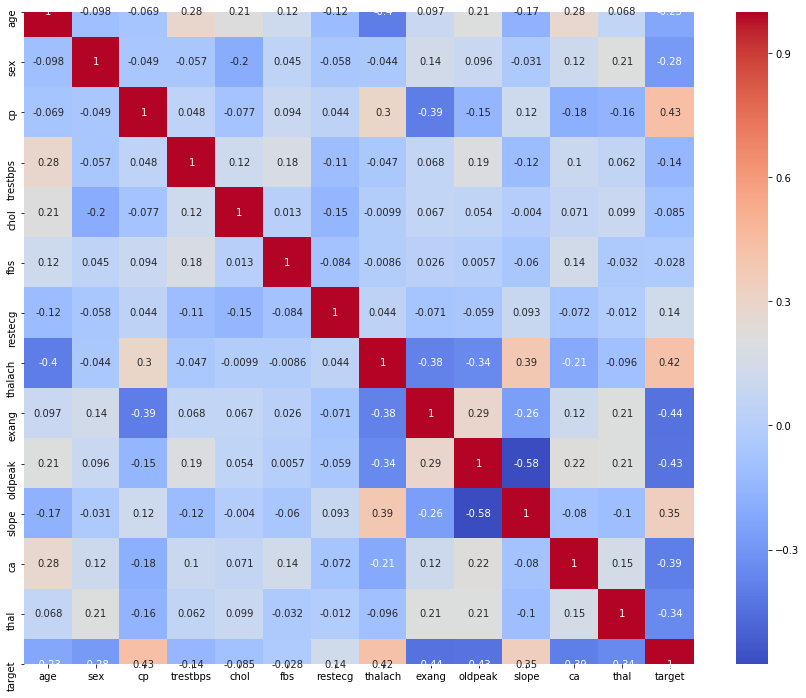

In [59]:
#Checking correlation of features with each other
plt.figure(figsize=(15,12))
sns.heatmap(df_heart.corr(),cmap='coolwarm',annot=True)
plt.show()

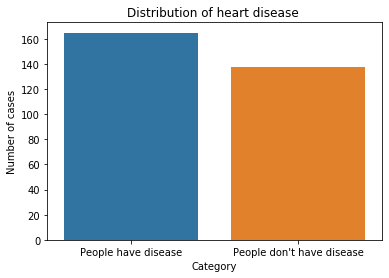

People have disease          0.544554
People don't have disease    0.455446
Name: target, dtype: float64

In [64]:
Plot=df_heart['target'].apply(lambda x: "People don't have disease" if x==0 else "People have disease" )
sns.countplot(Plot)
plt.title('Distribution of heart disease ')
plt.xlabel('Category')
plt.ylabel('Number of cases')
plt.show()
Plot.value_counts()
Plot.value_counts(normalize=True)

We can see that approx 54% have reported heart disease where as 46% don't have heart disease

To get more insight we have to draw multiple plots with all parameters and target

In [65]:
def Kdeplot(x):
    fig = plt.figure(figsize=(10,4))
    ax=sns.kdeplot(df_heart.loc[(df_heart['target'] == 0),x] , color='b',shade=True, label='No Disease') 
    ax=sns.kdeplot(df_heart.loc[(df_heart['target'] == 1),x] , color='r',shade=True, label='Disease')
    plt.title(' Heart Disease with respect to {}'.format(x))

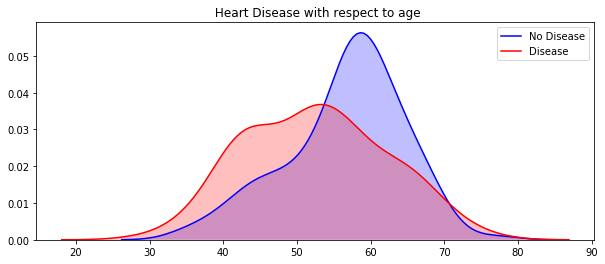

In [66]:
Kdeplot('age')

We can see that people in the range of age 40-55 are more prone to heart disease.

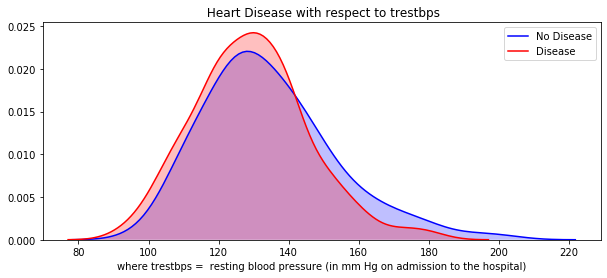

In [69]:
Kdeplot('trestbps')
plt.xlabel('where trestbps =  resting blood pressure (in mm Hg on admission to the hospital)')
plt.show()

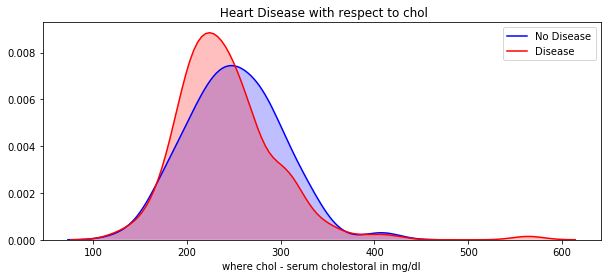

In [70]:
Kdeplot('chol')
plt.xlabel('where chol - serum cholestoral in mg/dl')
plt.show()

We can see that people in the range of cholestrol level 180-280 are more prone to heart disease.

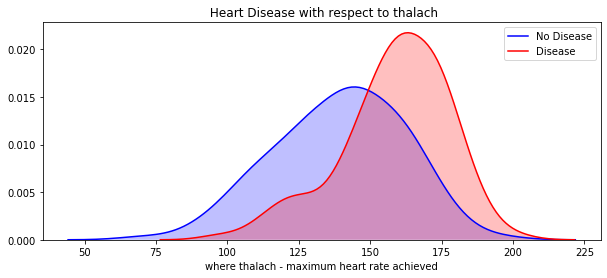

In [71]:
Kdeplot('thalach')
plt.xlabel('where thalach - maximum heart rate achieved')
plt.show()

We can see that people in the range of maximum heart beat rate 150-190 are more prone to heart disease.

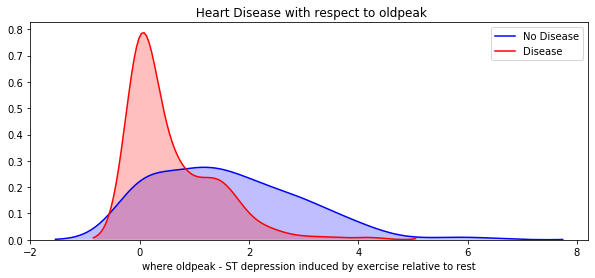

In [72]:
Kdeplot('oldpeak')
plt.xlabel('where oldpeak - ST depression induced by exercise relative to rest')
plt.show()

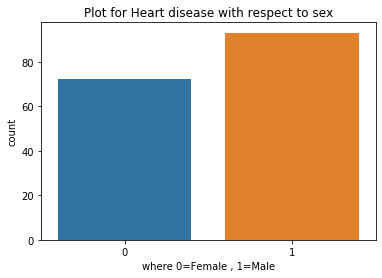

In [82]:
#Ploting against sex of the person 
sns.countplot(x='sex',data=df_heart.loc[df_heart['target']== 1])
plt.xlabel('where 0=Female , 1=Male')
plt.title('Plot for Heart disease with respect to sex')
plt.show()

We can see that Heart disease is more common in **Males**

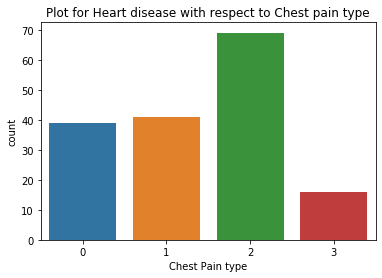

In [83]:
#Plot for Heart disease with respect to Chest pain type
sns.countplot(x='cp',data=df_heart.loc[df_heart['target']== 1])
plt.xlabel('Chest Pain type')
plt.title('Plot for Heart disease with respect to Chest pain type')
plt.show()

We can see that Heart disease is more common with  type 3 pain people

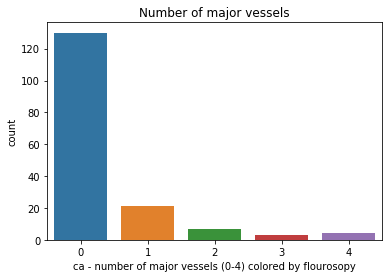

In [85]:
#Plot number of major vessels (0-4) colored by flourosopy, 
sns.countplot(x='ca',data=df_heart.loc[df_heart['target']== 1])
plt.xlabel('ca - number of major vessels (0-4) colored by flourosopy')
plt.title('Number of major vessels')
plt.show()

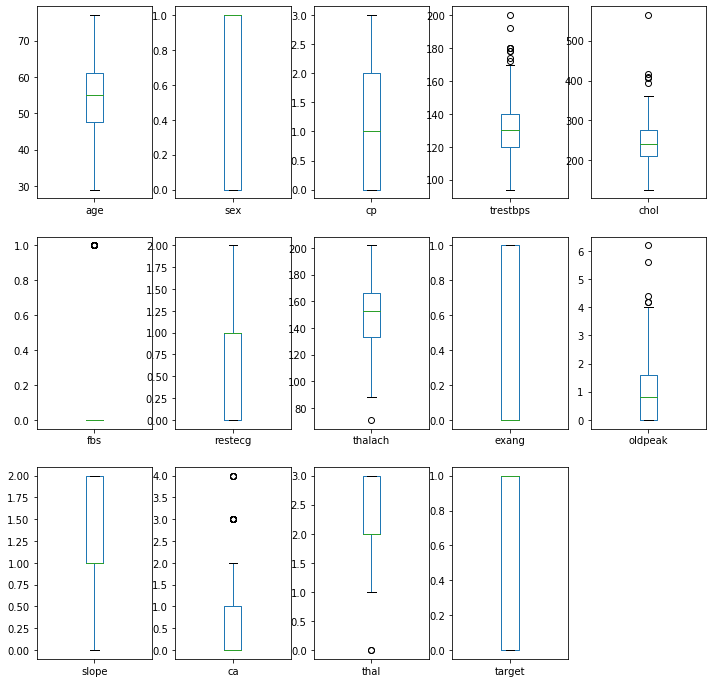

In [86]:
#Checking for outliers
df_heart.plot(kind='box',subplots=True,layout=(3,5),figsize=(12,12))
plt.show()

We can see that there are outliers which we have to remove

In [87]:
#Using Z score to remove outliers
from scipy.stats import zscore
z_score=np.abs(zscore(df_heart))
z_score

array([[0.9521966 , 0.68100522, 1.97312292, ..., 0.71442887, 2.14887271,
        0.91452919],
       [1.91531289, 0.68100522, 1.00257707, ..., 0.71442887, 0.51292188,
        0.91452919],
       [1.47415758, 1.46841752, 0.03203122, ..., 0.71442887, 0.51292188,
        0.91452919],
       ...,
       [1.50364073, 0.68100522, 0.93851463, ..., 1.24459328, 1.12302895,
        1.09345881],
       [0.29046364, 0.68100522, 0.93851463, ..., 0.26508221, 1.12302895,
        1.09345881],
       [0.29046364, 1.46841752, 0.03203122, ..., 0.26508221, 0.51292188,
        1.09345881]])

In [88]:
print(df_heart.shape)
thresold=3
Heart=df_heart[(z_score<3).all(axis=1)]
Heart.shape

(303, 14)


(287, 14)

We can see that outliers are removed

In [89]:
#Separating the input and ouput variable
df_x=Heart.drop(columns=['target'])
y=Heart['target']

In [90]:
#Checking for skewness in our input and output data
print(df_x.skew())
print("Total features: ",len(df_x.skew()))
print("Skewed features: ",len(df_x.skew().loc[abs(df_x.skew())>0.5]))

age        -0.184321
sex        -0.825426
cp          0.491220
trestbps    0.530712
chol        0.245591
fbs         2.051982
restecg     0.155787
thalach    -0.473864
exang       0.738876
oldpeak     0.984256
slope      -0.503916
ca          1.211037
thal       -0.190864
dtype: float64
Total features:  13
Skewed features:  7


In [91]:
for index in df_x.skew().index:
    if df_x.skew().loc[index]>0.5:
        df_x[index]=np.log1p(df_x[index])
    if df_x.skew().loc[index]<-0.5:
        df_x[index]=np.square(df_x[index])

In [92]:
# Again Checking for skewness in our data
print(df_x.skew())
print("Total features: ",len(df_x.skew()))
print("Skewed features: ",len(df_x.skew().loc[abs(df_x.skew())>0.5]))

age        -0.184321
sex        -0.825426
cp          0.491220
trestbps    0.172190
chol        0.245591
fbs         2.051982
restecg     0.155787
thalach    -0.473864
exang       0.738876
oldpeak     0.331394
slope       0.027892
ca          0.765030
thal       -0.190864
dtype: float64
Total features:  13
Skewed features:  4


In [93]:
#Using standard scalar method to Normalize our data or to bring all variable to common scale
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [94]:
# Again Checking for skewness in our data after Scaling
print(x.skew())
print("Total features: ",len(x.skew()))
print("Skewed features: ",len(x.skew().loc[abs(x.skew())>0.5]))

age        -0.184321
sex        -0.825426
cp          0.491220
trestbps    0.172190
chol        0.245591
fbs         2.051982
restecg     0.155787
thalach    -0.473864
exang       0.738876
oldpeak     0.331394
slope       0.027892
ca          0.765030
thal       -0.190864
dtype: float64
Total features:  13
Skewed features:  4


In [95]:
#Importing various neccessary parameters/fetures
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score 
import warnings
warnings.filterwarnings("ignore")

In [105]:
#Checking for best random state which give best accuracy/f1 score for various training techniques used to get best prediction
# Defining a class to check for best random state and f1 score.
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
def maxf1_score(tec,x,y):
    maxf1=0
    rand=0
    for r_state in range(42,100):
        train_x,test_x,train_y,test_y=train_test_split(x, y,random_state = r_state,test_size=0.20,stratify=y)
        tec.fit(train_x,train_y)
        y_pred=tec.predict(test_x)
        temp=f1_score(test_y,y_pred)
        if temp>maxf1:
            maxf1=temp
            rand=r_state
    print("Maximum f1_score is: ",maxf1, "at random state : ",rand)

In [97]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_val_score
import sklearn.naive_bayes

In [98]:
train_x,test_x,train_y,test_y=train_test_split(x, y,test_size=0.20,stratify=y)

Checking for best F1 score and random states for various techniques

In [106]:
LR=LogisticRegression()
maxf1_score(LR,x,y)

Maximum f1_score is:  0.955223880597015 at random state :  83


In [107]:
DT=DecisionTreeClassifier()
maxf1_score(DT,x,y)

Maximum f1_score is:  0.870967741935484 at random state :  85


In [108]:
KN=KNeighborsClassifier()
maxf1_score(KN,x,y)

Maximum f1_score is:  0.9142857142857143 at random state :  50


In [109]:
SV=SVC()
maxf1_score(SV,x,y)

Maximum f1_score is:  0.923076923076923 at random state :  71


In [110]:
RF=RandomForestClassifier()
maxf1_score(RF,x,y)

Maximum f1_score is:  0.8787878787878787 at random state :  83


In [111]:
GN=GaussianNB()
maxf1_score(GN,x,y)

Maximum f1_score is:  0.9253731343283582 at random state :  83


We can find best parameters using Grid Search CV method 

In [115]:
#Using Grid search CV for best parameters
from sklearn.model_selection import GridSearchCV
SV=SVC()
parameters = {'C': [0.1, 1],  
              'gamma': [1, 0.1], 
              'kernel': ['rbf','linear','poly']} 
clf = GridSearchCV(SV, parameters, cv=10)
clf.fit(x,y)
clf.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'linear'}

In [121]:
SV1=SVC(C=1,gamma=1,kernel='linear')
maxf1_score(SV1,x,y)

Maximum f1_score is:  0.9393939393939394 at random state :  71


We can see that we are getting best f1 score using Logistic Regression , let's check for other scores as well for each techniques

In [122]:
models=[]
models.append(('DecisionTreeClassifier', DT))
models.append(('SVC', SV1))
models.append(('KNeighborsClassifier',KN))
models.append(('GaussianNB', GN))
models.append(('LogisticRegression', LR))
models.append(('RandomForestClassifier', RF))

**************** DecisionTreeClassifier ****************


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


Accuracy Score =  0.6896551724137931


Cross Value Score =  0.7391169494617771


roc_auc_score =  0.7007211538461539


Classification_report 
               precision    recall  f1-score   support

           0       0.62      0.81      0.70        26
           1       0.79      0.59      0.68        32

    accuracy                           0.69        58
   macro avg       0.70      0.70      0.69        58
weighted avg       0.71      0.69      0.69        58



[[21  5]
 [13 19]]


AxesSubplot(0.125,0.808774;0.62x0.0712264

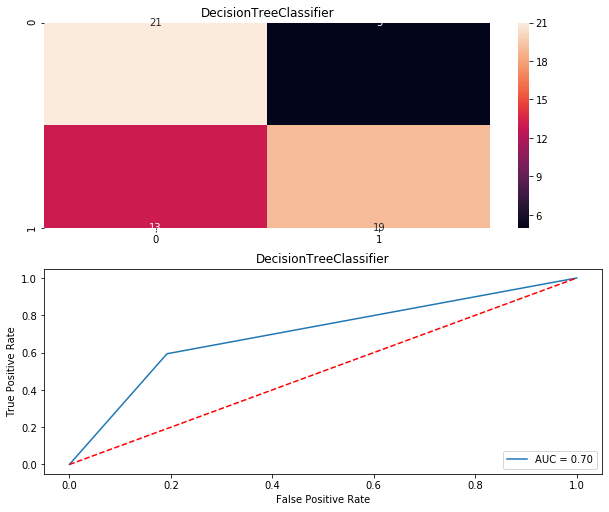

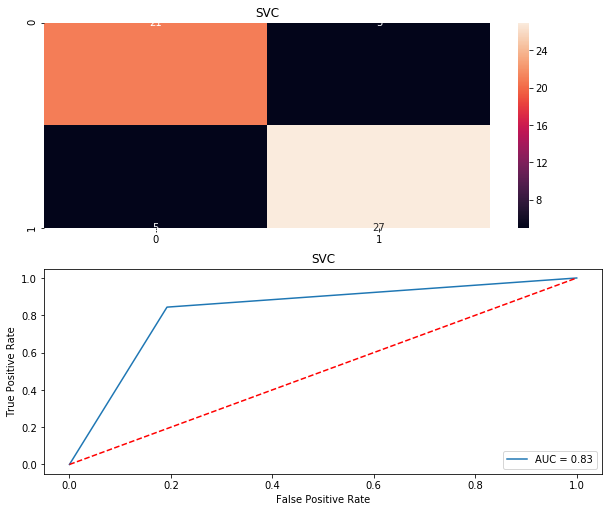

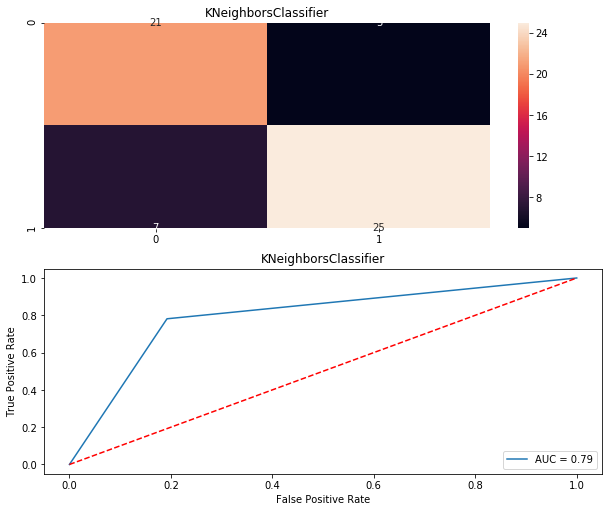

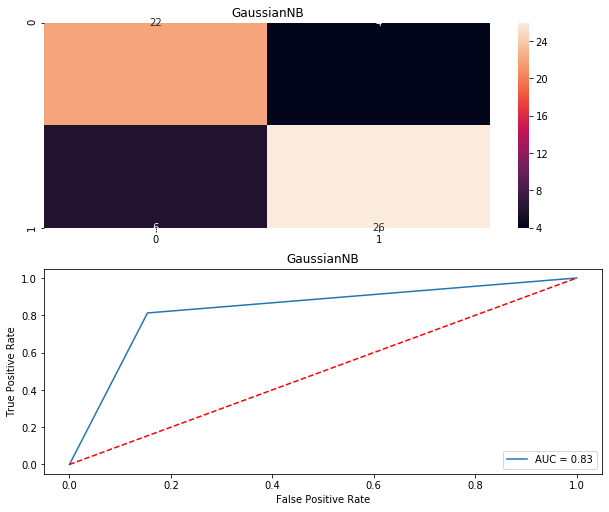

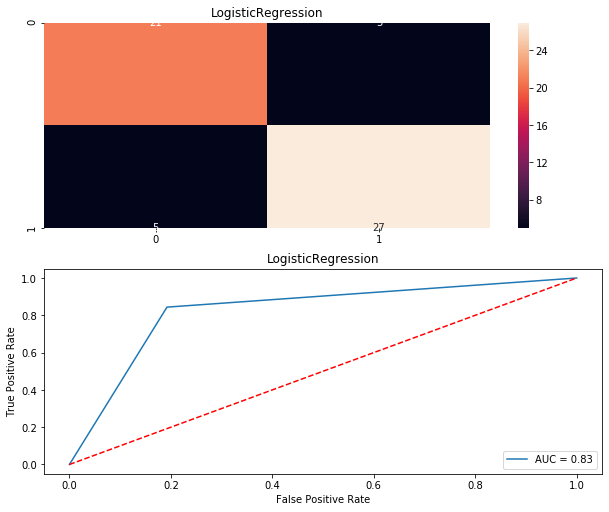

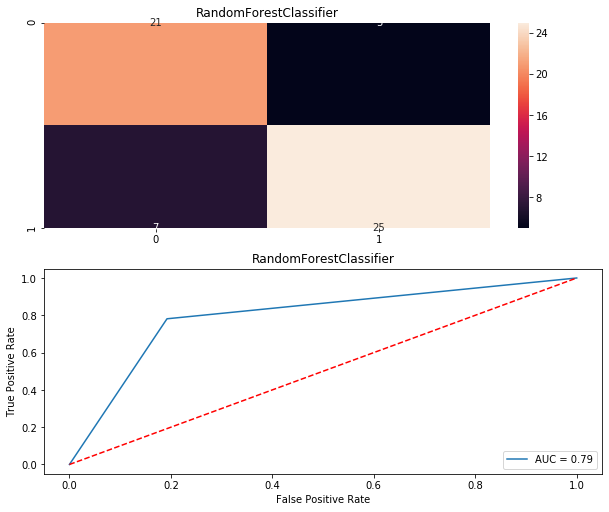

In [123]:
Model=[]
Score=[]
CVS=[]
rocscore=[]
for name,model in models:
    print('****************', name, '****************')
    print('\n')
    Model.append(name)
    model.fit(train_x,train_y)
    print(model)
    pre=model.predict(test_x)
    print('\n')
    AS= accuracy_score(test_y,pre)
    print('Accuracy Score = ', AS)
    Score.append(AS*100)
    print('\n')
    SC=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('Cross Value Score = ', SC)
    CVS.append(SC*100)
    print('\n')
    false_positive_rate, true_positive_rate,thresolds= roc_curve(test_y,pre)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score = ', roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('Classification_report \n', classification_report(test_y,pre))
    print('\n')
    cm= confusion_matrix(test_y,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

In [124]:
result= pd.DataFrame({'Model' : Model, 'Accuracy_Score' : Score, 'Cross_val_score' : CVS, 'Roc_auc_curve': rocscore})
result

,Model,Accuracy_Score,Cross_val_score,Roc_auc_curve
0,DecisionTreeClassifier,68.965517,73.911695,70.072115
1,SVC,82.758621,83.592410,82.572115
2,KNeighborsClassifier,79.310345,81.893815,79.447115
3,GaussianNB,82.758621,82.902755,82.932692
4,LogisticRegression,82.758621,83.937238,82.572115
5,RandomForestClassifier,79.310345,80.093961,79.447115


We can see that we are getting almost equal accuracy with SVC and Logistic Regression , we can save our final model now

In [125]:
# Saving our final model using Joblib
from sklearn.externals import joblib 
  

joblib.dump(SV, 'SV_Heart-Patient.pkl')

['SV_Heart-Patient.pkl']

**This is the best and final model we have saved**